In [ ]:
import sys
!{sys.executable} -m pip install numpy matplotlib

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# The data to fit
m = 20
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

/usr/local/lib/python3.9/site-packages/numpy/ma/core.py:2831: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _data = np.array(data, dtype=dtype, copy=copy,


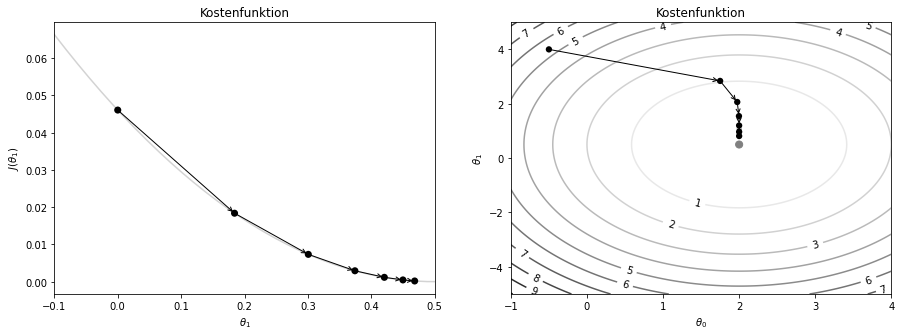

In [10]:
# The plot: LHS is the data, RHS will be the cost function.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = axs[0]

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.1,0.8,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax.plot(theta1_grid, J_grid, 'lightgray', zorder=-1)

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 7
alpha = 1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum(
                                    (hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['black' for _ in range(N)]
for j in range(1,N):
    ax.annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'k', 'lw': 1},
                   va='center', ha='center', zorder=1)

# Labels, titles and a legend.
ax.scatter(theta1, J, c=colors, s=50, lw=0)
ax.set_xlim(-0.1,0.5)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$J(\theta_1)$')
ax.set_title('Kostenfunktion')

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

ax = axs[1]

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
norm = plt.cm.colors.Normalize(vmax=abs(J_grid).max(), vmin=-abs(J_grid).max())
cmap = plt.cm.binary
contours = ax.contour(X, Y, J_grid, 10, cmap=cmap, zorder=-2)
ax.clabel(contours, colors="k")
# The target parameter values indicated on the cost function contour plot
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], zorder=-1,color="gray")

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
for alpha in [0.9]:
    N = 7
    theta = [np.array((-0.5,4))]
    J = [cost_func(*theta[0])[0]]
    for j in range(N-1):
        last_theta = theta[-1]
        this_theta = np.empty((2,))
        this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                        (hypothesis(x, *last_theta) - y))
        this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                        (hypothesis(x, *last_theta) - y) * x)
        theta.append(this_theta)
        J.append(cost_func(*this_theta))


    # Annotate the cost function plot with coloured points indicating the
    # parameters chosen and red arrows indicating the steps down the gradient.
    # Also plot the fit function on the LHS data plot in a matching colour.
    colors = ['black' for _ in range(N)]
    for j in range(1,N):
        ax.annotate('', xy=theta[j], xytext=theta[j-1],
                    arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 1},
                    va='center', ha='center', zorder=1)
    ax.scatter(*zip(*theta), c=colors, s=40, lw=0, zorder=1)

# Labels, titles and a legend.
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Kostenfunktion')

plt.savefig('grad-desc-example.pdf', dpi=1200, bbox_inches='tight')